In [84]:
import numpy as np
import random
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow.keras import layers, models

## Vytvoreni dat  f-ce = sin(x) na int. 0-2Pi

y - zasumely

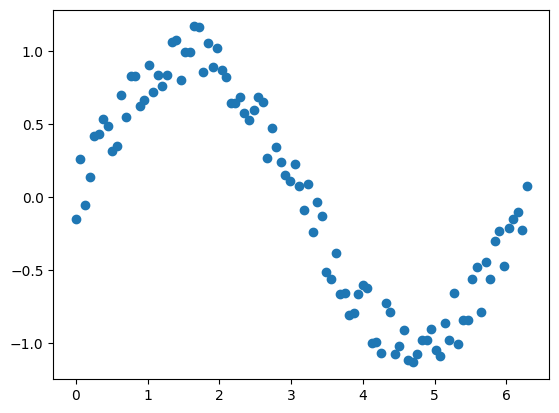

In [85]:
pocet_hodnot = 100
x = np.linspace(0, 2*np.pi, pocet_hodnot)
y = np.sin(x) + np.random.uniform(-0.2, 0.2, size = pocet_hodnot)
plt.scatter(x,y)

## Predzpracovani dat pro uceni a test

X_scaled = scaler.fit_transform(x) - Expected 2D array (pomoci reshape z 1D bude 2D)

In [86]:
x = x.reshape(-1, 1) # collumn
y = y.reshape(-1,1)
print(f'x_min = {x.min()}, x_max = {x.max()}, y_min = {y.min()}, y_max = {y.max()}')

x_min = 0.0, x_max = 6.283185307179586, y_min = -1.1332600350513087, y_max = 1.1689312714421678


In [87]:
# print(x)
# x = x.reshape((len(x), 1))
# print(x)

1) MinMaxScaler - преобразует все значения в диапазоне между заданным минимальным и максимальным значениями (обычно между 0, 1)

2) одно random_state значение имеет фиксированный набор перемешанных данных. Каждый раз с одинаковым random_state будет выдавать один набор данных для test train

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(x)
Y_scaled = scaler.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state = 0)

print(f'x_min = {X_scaled.min()}, x_max = {X_scaled.max()}, y_min = {Y_scaled.min()}, y_max = {Y_scaled.max()}')

x_min = 0.0, x_max = 1.0, y_min = 0.0, y_max = 1.0


## Model a Vytvoreni Modelu

In [89]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform')) # Added correctly
model.add(layers.Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(layers.Dense(1)) # This layer acts as an output layer

# Compile the model
model.compile(loss='mse', optimizer='adam')

# If you want to print a summary to check your model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Uceni

In [90]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=5000, batch_size=len(x_train), verbose=0) #verbose = 0/1  nechci/chci vypisovat chybu neuronove site behem uceni batch_size=10

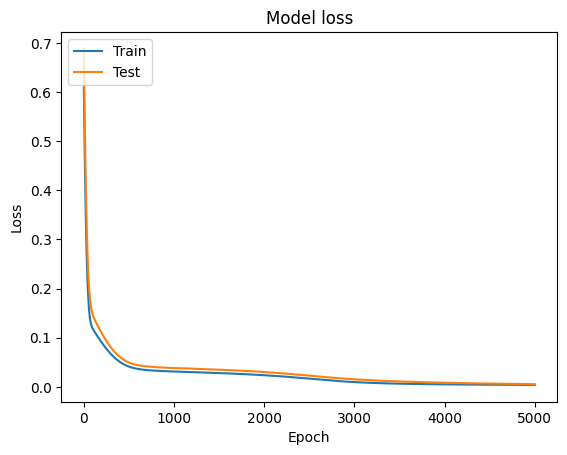

In [91]:
#vykresleni vyvoje chyby site na treninkove a testovaci mnozine behem uceni
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Восстановление исходного масштаба данных после MinMaxScaler до исходного начального маштаба после пресказания на нормализированных данных

In [92]:
y_pred_train_non_sc = model.predict(x_train)
y_pred_test_non_sc = model.predict(y_test)

y_predict_train = scaler.inverse_transform(y_pred_train_non_sc)
y_predict_test = scaler.inverse_transform(y_pred_test_non_sc)


x_train_non_scale = scaler.inverse_transform(x_train)
y_train_non_scale = scaler.inverse_transform(y_train)

x_test_non_scale = scaler.inverse_transform(x_test)
y_test_non_scale = scaler.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error
print(f'MSE: {mean_squared_error(y_train_non_scale, y_predict_train)}')

1/1 [==============================] - 0s 62ms/step
MSE: 0.021434761271186105


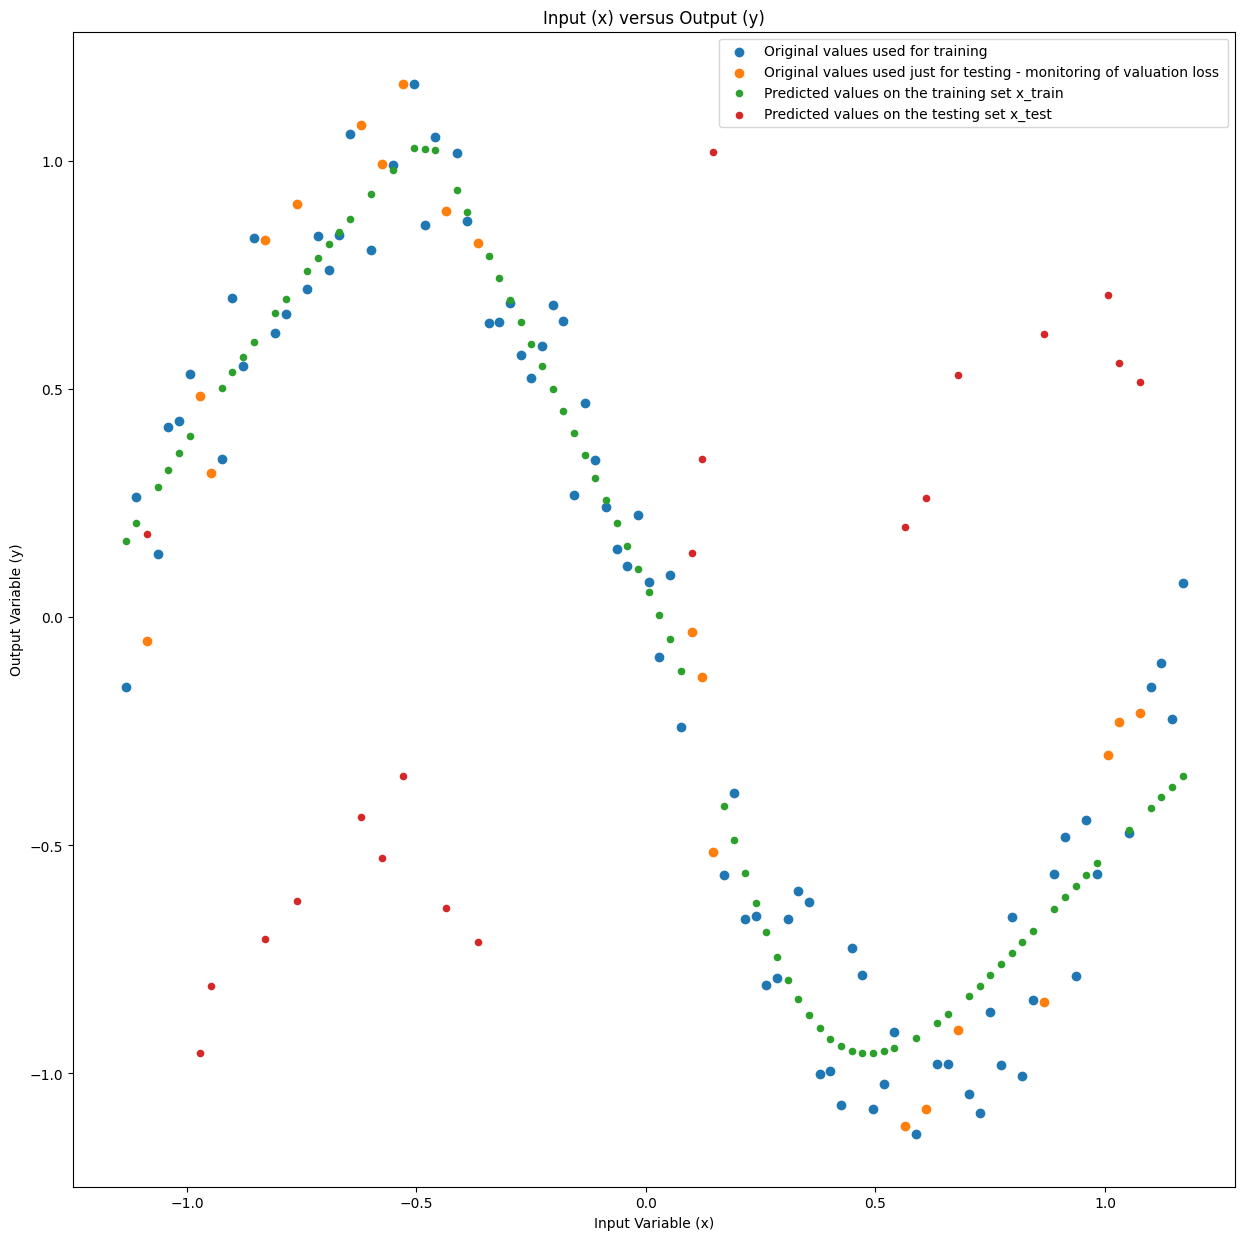

In [93]:
fig = plt.figure (figsize=(15,15))
plt.scatter(x_train_non_scale,y_train_non_scale, label='Original values used for training')
plt.scatter(x_test_non_scale,y_test_non_scale, label='Original values used just for testing - monitoring of valuation loss ')
# plot x vs yhat
plt.scatter(x_train_non_scale,y_predict_train, label='Predicted values on the training set x_train', s=20)
plt.scatter(x_test_non_scale,y_predict_test, label='Predicted values on the testing set x_test', s=20)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

In [97]:
import pandas as pd

# История обучения
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history.csv", index=False)



In [ ]:
# Сохранение архитектуры
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")
